# Netflix Dataset: Data Preparation & EDA (40% Visualizations)

Goal: Prepare the Netflix dataset for machine learning through:
1. Data Cleaning
2. Feature Engineering
3. Outlier Handling
4. Correlation & Relationships
5. Data Balancing
6. Model Preparation

### Data Understanding & Inspection

In [1]:
!pip install wordcloud


/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
import warnings
warnings.filterwarnings('ignore')

/home/tanisha.ramani@simform.dom/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Load dataset

In [3]:
df = pd.read_csv('netflix_titles.csv')


Overview of data

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Content Type Distribution

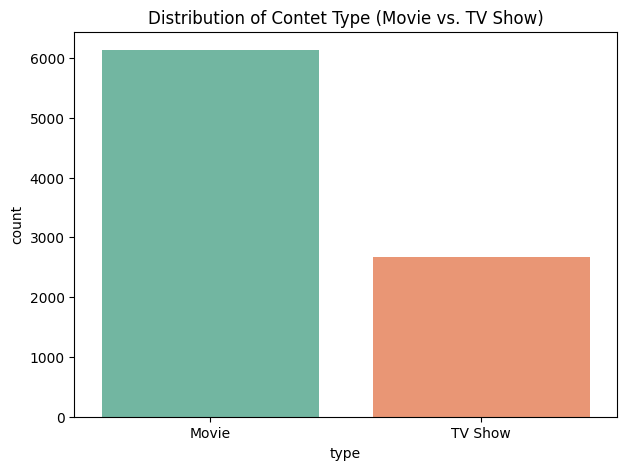

In [7]:
# Content type distribution
plt.figure(figsize=(7,5))
sns.countplot(x='type', data=df, palette="Set2")
plt.title("Distribution of Contet Type (Movie vs. TV Show)")
plt.show()

Rating Distribution

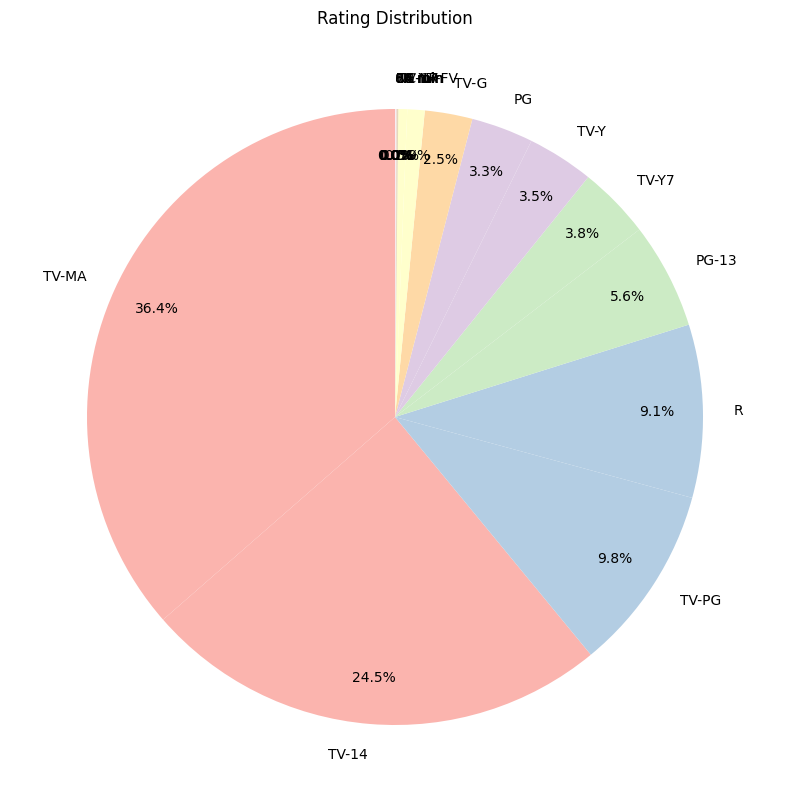

In [8]:
plt.figure(figsize=(10,10))
df['rating'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='Pastel1', 
    pctdistance=0.85,      # Moves percentage labels closer to the center
    labeldistance=1.1      # Moves slice labels farther from the center
)

plt.title("Rating Distribution")
plt.ylabel("")
plt.show()


Missing Values Heatmap

#  Visualizing Missing Values per Column in a DataFrame

This script identifies and visualizes the number of missing values in each column using **Pandas** and **Seaborn**.

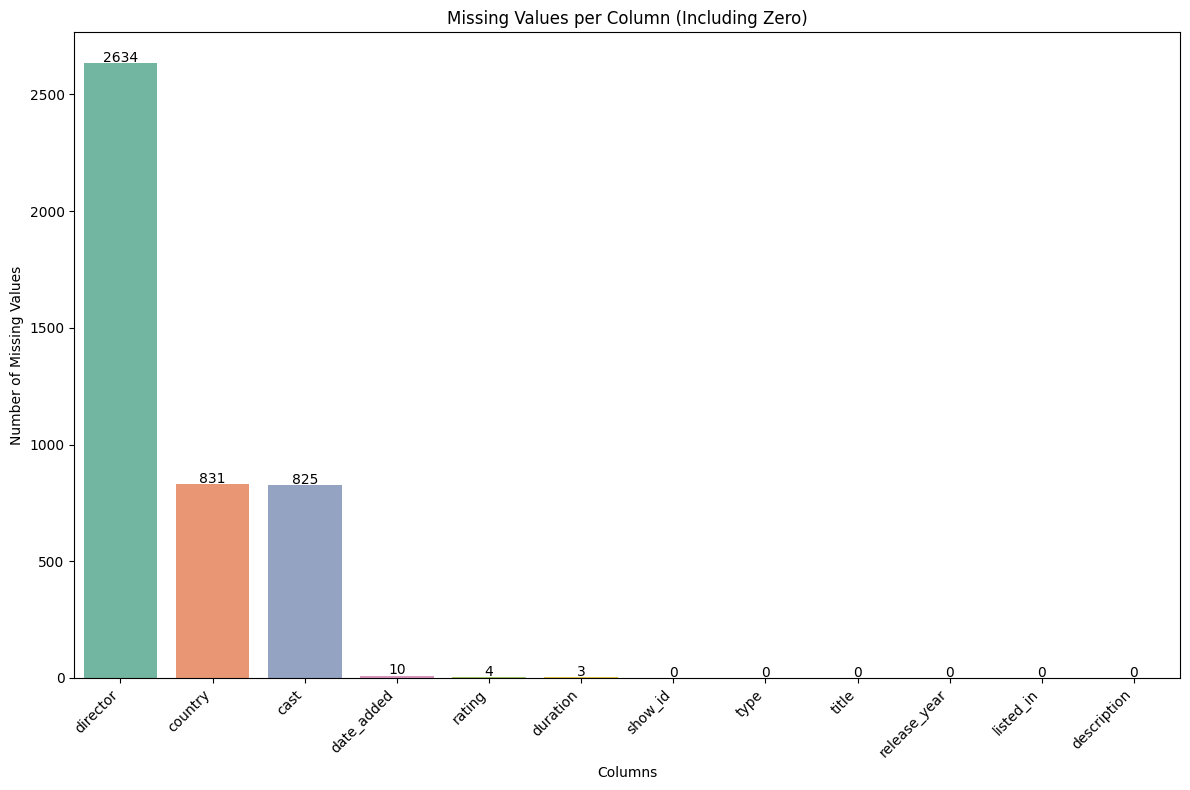

In [9]:
# Count missing values per column
missing_values = df.isnull().sum()

# Create a DataFrame to store missing counts
missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})

# Sort columns by missing values (descending)
missing_df = missing_df.sort_values(by='Missing Values', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create vertical bar plot
sns.barplot(x='Column', y='Missing Values', data=missing_df, palette="Set2")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add exact missing value counts as text labels
for index, value in enumerate(missing_df['Missing Values']):
    plt.text(index, value + 5, f'{value}', color='black', ha="center")

# Chart labels and title
plt.title("Missing Values per Column (Including Zero)")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")

plt.tight_layout()
plt.show()


## Data Cleaning

Handling Missing Values

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df.isnull().sum().sum()

4307

#  Calculating Missing Values and Their Percentage

This script computes both the **total missing values** and their **percentage** for each column in a DataFrame using **Pandas**.

In [12]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
# missing_values, missing_percent

missing_df = pd.DataFrame({'Missing values':missing_values, 'Missing percent':missing_percent})

missing_df


,Missing values,Missing percent
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


In [13]:
missing_df = missing_df[missing_df['Missing values'] > 0].sort_values(by='Missing percent', ascending=False)

print("\nMissing Values:\n\n\n", missing_df)


Missing Values:


             Missing values  Missing percent
director              2634        29.908028
country                831         9.435676
cast                   825         9.367549
date_added              10         0.113546
rating                   4         0.045418
duration                 3         0.034064


#  Filling Missing Values in Specific Columns

This script fills missing values in specified columns of a DataFrame using **custom values** or the **mode** (most frequent value).


In [14]:
df["director"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)
df["cast"].fillna("Not Available", inplace=True)
df["date_added"].fillna("Unknown", inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)  
df["duration"].fillna(df["duration"].mode()[0], inplace=True)  

In [15]:
df2 = df.copy()

In [16]:
df.drop_duplicates(inplace=True)

Standardize Text Data

In [17]:
for col in ['title', 'director', 'cast', 'listed_in']:
    df[col] = df[col].str.lower().str.strip()

### Feature Engineering



Content Over Years

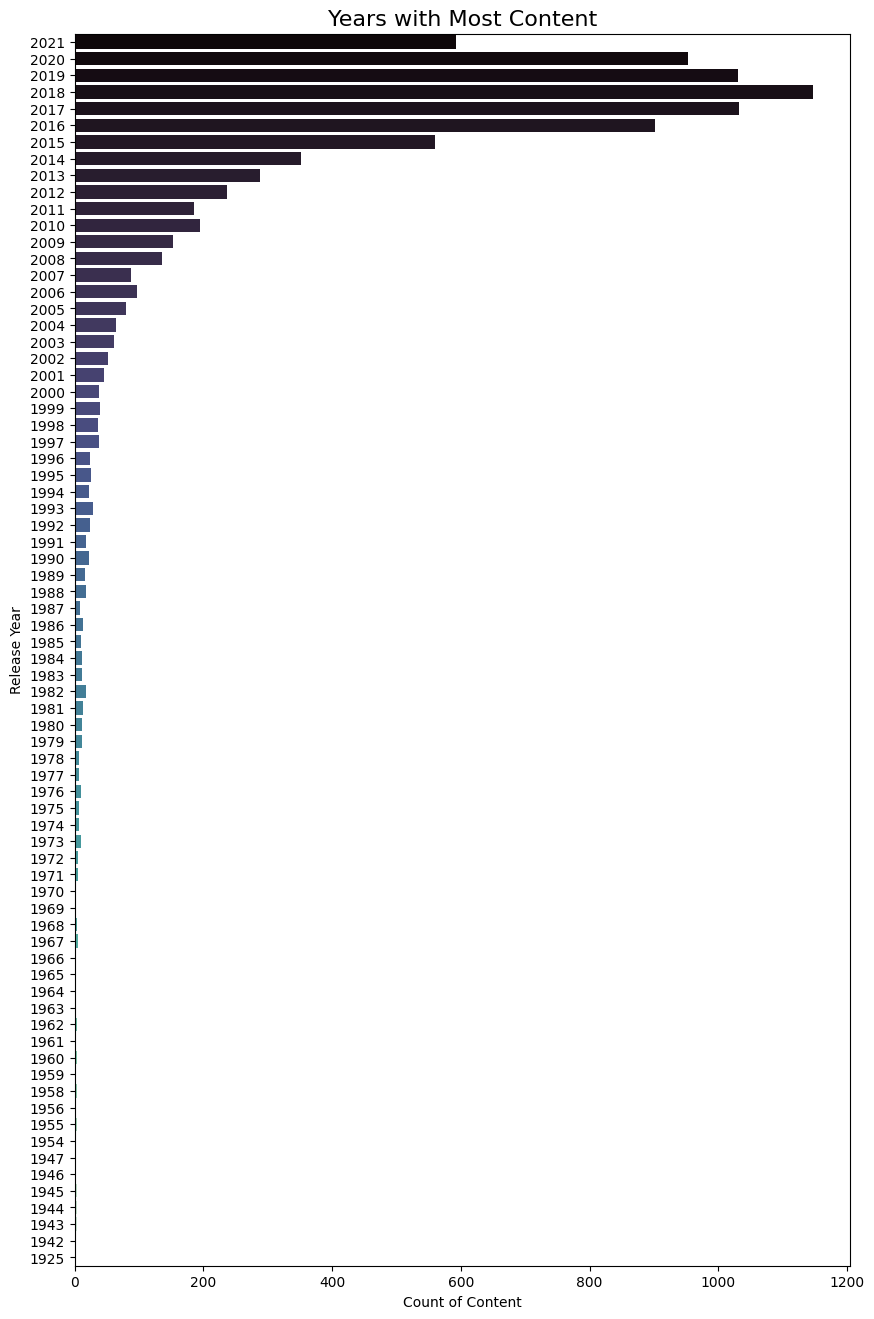

In [18]:
plt.figure(figsize=(10, 16))

# Correct syntax for ordering by year in descending order
sns.countplot(y='release_year', data=df, palette="mako", order=df['release_year'].value_counts().index.sort_values(ascending=False))

plt.title("Years with Most Content", fontsize=16)
plt.xlabel("Count of Content")
plt.ylabel("Release Year")

plt.show()

In [19]:
df['type'] = df['type'].map({"Movie":0, "TV Show":1})
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,dick johnson is dead,kirsten johnson,not available,United States,"September 25, 2021",2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...


# Extracting Movie Duration and TV Show Seasons

This script processes the `duration` column in a DataFrame to extract:
- **Movie duration (in minutes)** for movies.
- **Number of seasons** for TV shows.

In [20]:
# Step 1: Ensure 'duration' is treated as a string and handle missing values properly
df["duration"].fillna("0 min", inplace=True)

# Step 2: Extract movie duration (in minutes) and TV show seasons correctly
df['Movie_duration'] = df.apply(lambda x: int(x['duration'].split()[0]) if 'min' in x['duration'] and x['type'] == 0 else 0, axis=1)
df['TVShow_Seasons'] = df.apply(lambda x: int(x['duration'].split()[0]) if 'Season' in x['duration'] and x['type'] == 1 else 0, axis=1)

# Step 3: Drop the original 'duration' column
# df.drop('duration', axis=1, inplace=True)

# Step 4: Verify the corrected DataFrame
print(df[['type','title', 'Movie_duration', 'TVShow_Seasons']].head(10))


   type                             title  Movie_duration  TVShow_Seasons
0     0              dick johnson is dead              90               0
1     1                     blood & water               0               2
2     1                         ganglands               0               1
3     1             jailbirds new orleans               0               1
4     1                      kota factory               0               2
5     1                     midnight mass               0               1
6     0  my little pony: a new generation              91               0
7     0                           sankofa             125               0
8     1     the great british baking show               0               9
9     0                      the starling             104               0


In [21]:
# Access specific rows by their index
indexes = [0, 1,234,5541, 5794, 5813]
df.loc[indexes, ['title', 'duration', 'type', 'Movie_duration', 'TVShow_Seasons']]


,title,duration,type,Movie_duration,TVShow_Seasons
0,dick johnson is dead,90 min,0,90,0
1,blood & water,2 Seasons,1,0,2
234,oggy oggy,1 Season,1,0,1
5541,louis c.k. 2017,1 Season,0,0,0
5794,louis c.k.: hilarious,1 Season,0,0,0
5813,louis c.k.: live at the comedy store,1 Season,0,0,0


In [22]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_duration,TVShow_Seasons
0,s1,0,dick johnson is dead,kirsten johnson,not available,United States,"September 25, 2021",2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm...",90,0
1,s2,1,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",0,2


In [23]:
mislabeled = df.loc[indexes]
mislabeled[(mislabeled['type'] == 0) & (mislabeled['duration'].str.contains('Season'))]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_duration,TVShow_Seasons
5541,s5542,0,louis c.k. 2017,louis c.k.,louis c.k.,United States,"April 4, 2017",2017,74 min,1 Season,movies,"Louis C.K. muses on religion, eternal love, gi...",0,0
5794,s5795,0,louis c.k.: hilarious,louis c.k.,louis c.k.,United States,"September 16, 2016",2010,84 min,1 Season,movies,Emmy-winning comedy writer Louis C.K. brings h...,0,0
5813,s5814,0,louis c.k.: live at the comedy store,louis c.k.,louis c.k.,United States,"August 15, 2016",2015,66 min,1 Season,movies,The comic puts his trademark hilarious/thought...,0,0


In [24]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_duration,TVShow_Seasons
0,s1,0,dick johnson is dead,kirsten johnson,not available,United States,"September 25, 2021",2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm...",90,0
1,s2,1,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",0,2
2,s3,1,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,0,1


In [25]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Movie_duration', 'TVShow_Seasons'],
      dtype='object')

In [26]:
df = df[['show_id', 'type', 'Movie_duration','TVShow_Seasons', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description']]

In [27]:
df_copy = df

In [28]:
df.head(2)

,show_id,type,Movie_duration,TVShow_Seasons,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,0,90,0,dick johnson is dead,kirsten johnson,not available,United States,"September 25, 2021",2020,PG-13,documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,0,2,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",South Africa,"September 24, 2021",2021,TV-MA,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t..."


In [29]:
df.head(2)

,show_id,type,Movie_duration,TVShow_Seasons,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,0,90,0,dick johnson is dead,kirsten johnson,not available,United States,"September 25, 2021",2020,PG-13,documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,0,2,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",South Africa,"September 24, 2021",2021,TV-MA,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t..."


In [30]:
df.drop('show_id', axis=1, inplace=True)

In [31]:
df.head(2)

,type,Movie_duration,TVShow_Seasons,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,0,90,0,dick johnson is dead,kirsten johnson,not available,United States,"September 25, 2021",2020,PG-13,documentaries,"As her father nears the end of his life, filmm..."
1,1,0,2,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",South Africa,"September 24, 2021",2021,TV-MA,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t..."


# Mapping ratings to numerical feature for better idea

In [32]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [33]:
duration_in_rating = df[df['rating'].str.contains('min', case=False, na=False)]
duration_in_rating

,type,Movie_duration,TVShow_Seasons,title,director,cast,country,date_added,release_year,rating,listed_in,description
5541,0,0,0,louis c.k. 2017,louis c.k.,louis c.k.,United States,"April 4, 2017",2017,74 min,movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,0,0,0,louis c.k.: hilarious,louis c.k.,louis c.k.,United States,"September 16, 2016",2010,84 min,movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,0,0,0,louis c.k.: live at the comedy store,louis c.k.,louis c.k.,United States,"August 15, 2016",2015,66 min,movies,The comic puts his trademark hilarious/thought...


In [34]:
# Get matching rows from df2 using index from duration_in_rating
matched_duration = df2.loc[duration_in_rating.index, ['title', 'duration', 'type']]

# Display the matched durations
print(matched_duration)

                                     title  duration   type
5541                       Louis C.K. 2017  1 Season  Movie
5794                 Louis C.K.: Hilarious  1 Season  Movie
5813  Louis C.K.: Live at the Comedy Store  1 Season  Movie


In [35]:
df.describe(include="all")

,type,Movie_duration,TVShow_Seasons,title,director,cast,country,date_added,release_year,rating,listed_in,description
count,8807.000000,8807.000000,8807.000000,8807,8807,8807,8807,8807,8807.000000,8807,8807,8807
unique,NaN,NaN,NaN,8801,4527,7693,749,1768,NaN,17,514,8775
top,NaN,NaN,NaN,consequences,unknown,not available,United States,"January 1, 2020",NaN,TV-MA,"dramas, international movies","Paranormal activity at a lush, abandoned prope..."
freq,NaN,NaN,NaN,2,2634,825,2818,109,NaN,3211,362,4
mean,0.303849,69.286817,0.536278,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN
std,0.459944,51.534755,1.191620,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,0.000000,88.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,1.000000,106.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [36]:
df.columns

Index(['type', 'Movie_duration', 'TVShow_Seasons', 'title', 'director', 'cast',
       'country', 'date_added', 'release_year', 'rating', 'listed_in',
       'description'],
      dtype='object')

In [37]:
# 🟢 Identify Movies with Zero Duration
movies_with_zero_duration = df[(df['type'] == 0) & (df['Movie_duration'] == 0)]
print("🎬 Movies with Zero Duration:")
print(movies_with_zero_duration)

# Save the filtered movie records
movies_with_zero_duration.to_csv('movies_with_zero_duration.csv', index=False)

# 🔵 Identify TV Shows with Zero Seasons
tvshows_with_zero_seasons = df[(df['type'] == 1) & (df['TVShow_Seasons'] == 0)]
print("📺 TV Shows with Zero Seasons:")
print(tvshows_with_zero_seasons)

# Save the filtered TV show records
tvshows_with_zero_seasons.to_csv('tvshows_with_zero_seasons.csv', index=False)

print("✅ Data saved: 'movies_with_zero_duration.csv' and 'tvshows_with_zero_seasons.csv'")



🎬 Movies with Zero Duration:
      type  Movie_duration  TVShow_Seasons  \
5541     0               0               0   
5794     0               0               0   
5813     0               0               0   

                                     title    director        cast  \
5541                       louis c.k. 2017  louis c.k.  louis c.k.   
5794                 louis c.k.: hilarious  louis c.k.  louis c.k.   
5813  louis c.k.: live at the comedy store  louis c.k.  louis c.k.   

            country          date_added  release_year  rating listed_in  \
5541  United States       April 4, 2017          2017  74 min    movies   
5794  United States  September 16, 2016          2010  84 min    movies   
5813  United States     August 15, 2016          2015  66 min    movies   

                                            description  
5541  Louis C.K. muses on religion, eternal love, gi...  
5794  Emmy-winning comedy writer Louis C.K. brings h...  
5813  The comic puts his trade

In [38]:
# Check the shape of the original DataFrame
print("Original Shape:", df.shape)

# Find rows where 'type' == 0 and 'Movie_duration' == 0 (for movies)
movies_with_zero_duration = df[(df['type'] == 0) & (df['Movie_duration'] == 0)]

# Find rows where 'type' == 1 and 'TVShow_Seasons' == 0 (for TV shows)
tvshows_with_zero_seasons = df[(df['type'] == 1) & (df['TVShow_Seasons'] == 0)]

# Combine indices of both conditions
indices_to_drop = movies_with_zero_duration.index.union(tvshows_with_zero_seasons.index)

# Verify the rows to be dropped
print("Rows to drop:", len(indices_to_drop))

# Drop rows and create a new DataFrame
df = df.drop(indices_to_drop)

# Check the new shape after dropping rows
print("New Shape:", df.shape)


Original Shape: (8807, 12)
Rows to drop: 3
New Shape: (8804, 12)


In [39]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [40]:
df2 = df[df['rating'].str.contains('min')]

In [41]:
df2

,type,Movie_duration,TVShow_Seasons,title,director,cast,country,date_added,release_year,rating,listed_in,description


In [42]:
df.shape


(8804, 12)

In [43]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [44]:
df['rating'].nunique()

14

In [45]:
# Sample Data (14 unique categories)
ratings = [
    'TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV', 'PG', 'TV-PG',
    'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA', 'NR', 'UR'
]

# DataFrame creation
df1 = pd.DataFrame(ratings, columns=['rating'])

# Custom mapping for age groups
age_group_mapping = {
    'TV-Y': '0-6 (Young Kids)', 'TV-G': '0-7 (Young Kids)', 'G': '0-7 (Young Kids)',
    'TV-Y7': '7+ (Older Kids)', 'TV-Y7-FV': '7+ (Older Kids, FV)',
    'PG': '8-12 (Older Kids)', 'TV-PG': '8-12 (Older Kids)',
    'PG-13': '13-16 (Teens)', 'TV-14': '14-16 (Teens)',
    'R': '17+ (Adults)', 'NC-17': '17+ (Adults)', 'TV-MA': '18+ (Adults)',
    'NR': 'Unknown', 'UR': 'Unknown'
}

# Map the age groups
df['age_group'] = df['rating'].map(age_group_mapping)

# Custom order for age groups (preserving ordinal relation)
age_order = [
    '0-6 (Young Kids)', '0-7 (Young Kids)',
    '7+ (Older Kids)', '7+ (Older Kids, FV)',
    '8-12 (Older Kids)', '13-16 (Teens)', '14-16 (Teens)',
    '17+ (Adults)', '18+ (Adults)', 'Unknown'
]

# Apply label encoding based on the age hierarchy
df['age_encoded'] = df['age_group'].apply(lambda x: age_order.index(x))

# Display the DataFrame



In [46]:
df1

,rating
0,TV-Y
1,TV-G
2,G
3,TV-Y7
4,TV-Y7-FV
5,PG
6,TV-PG
7,PG-13
8,TV-14
9,R


In [47]:
df

,type,Movie_duration,TVShow_Seasons,title,director,cast,country,date_added,release_year,rating,listed_in,description,age_group,age_encoded
0,0,90,0,dick johnson is dead,kirsten johnson,not available,United States,"September 25, 2021",2020,PG-13,documentaries,"As her father nears the end of his life, filmm...",13-16 (Teens),5
1,1,0,2,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",South Africa,"September 24, 2021",2021,TV-MA,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",18+ (Adults),8
2,1,0,1,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",Unknown,"September 24, 2021",2021,TV-MA,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,18+ (Adults),8
3,1,0,1,jailbirds new orleans,unknown,not available,Unknown,"September 24, 2021",2021,TV-MA,"docuseries, reality tv","Feuds, flirtations and toilet talk go down amo...",18+ (Adults),8
4,1,0,2,kota factory,unknown,"mayur more, jitendra kumar, ranjan raj, alam k...",India,"September 24, 2021",2021,TV-MA,"international tv shows, romantic tv shows, tv ...",In a city of coaching centers known to train I...,18+ (Adults),8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,158,0,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",United States,"November 20, 2019",2007,R,"cult movies, dramas, thrillers","A political cartoonist, a crime reporter and a...",17+ (Adults),7
8803,1,0,2,zombie dumb,unknown,not available,Unknown,"July 1, 2019",2018,TV-Y7,"kids' tv, korean tv shows, tv comedies","While living alone in a spooky town, a young g...",7+ (Older Kids),2
8804,0,88,0,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",United States,"November 1, 2019",2009,R,"comedies, horror movies",Looking to survive in a world taken over by zo...,17+ (Adults),7
8805,0,88,0,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",United States,"January 11, 2020",2006,PG,"children & family movies, comedies","Dragged from civilian life, a former superhero...",8-12 (Older Kids),4


In [48]:
df.columns

Index(['type', 'Movie_duration', 'TVShow_Seasons', 'title', 'director', 'cast',
       'country', 'date_added', 'release_year', 'rating', 'listed_in',
       'description', 'age_group', 'age_encoded'],
      dtype='object')

## Age Group Distribution by Content Type

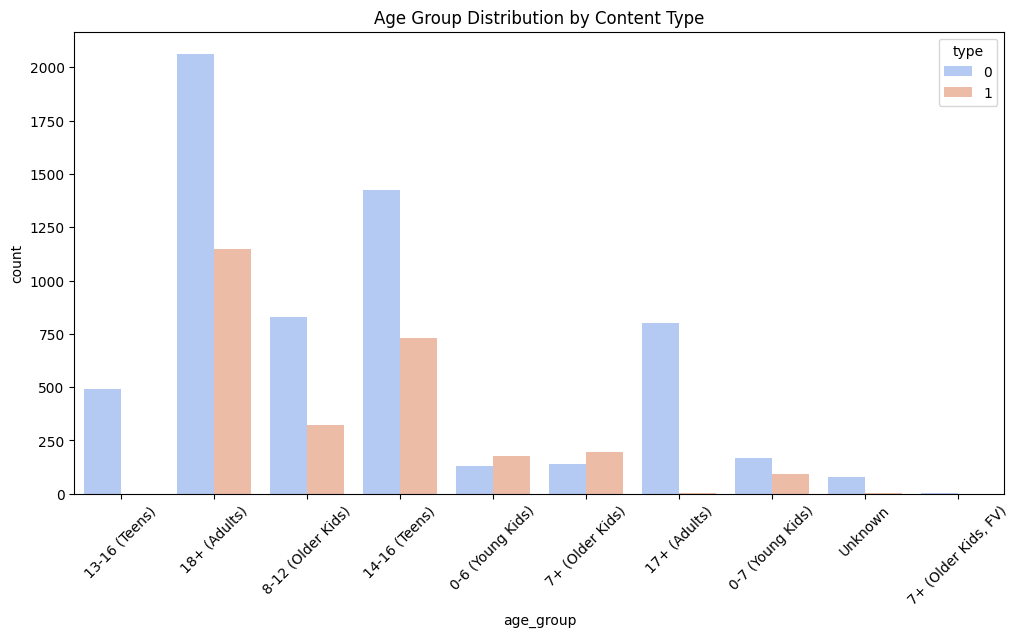

In [49]:
plt.figure(figsize=(12, 6))  # Increase figure size
sns.countplot(x='age_group', hue='type', data=df, palette="coolwarm")
plt.title("Age Group Distribution by Content Type")
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()

## Distribution of Country Encodings

In [50]:
country_freq = df['country'].value_counts()
df['country_encoded'] = df['country'].map(country_freq)

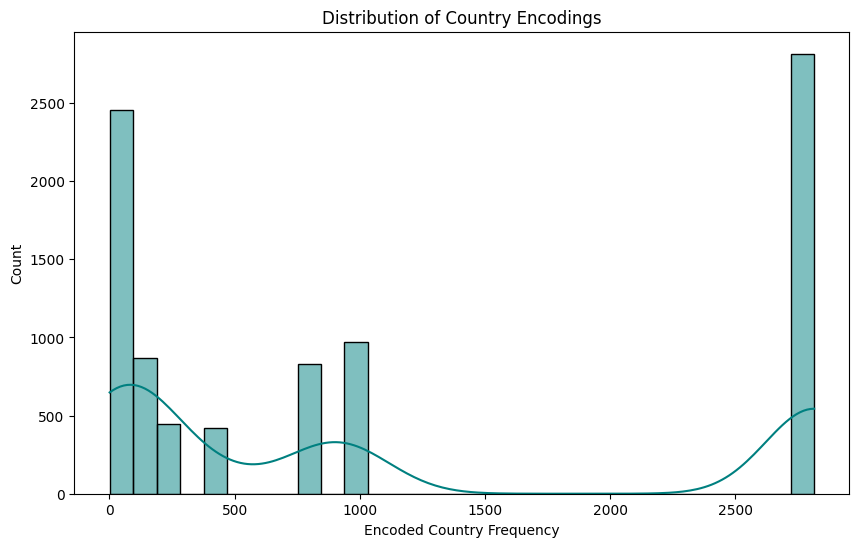

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['country_encoded'], bins=30, kde=True, color='teal')
plt.title('Distribution of Country Encodings')
plt.xlabel('Encoded Country Frequency')
plt.ylabel('Count')
plt.show()


## Distribution of Country Encodings

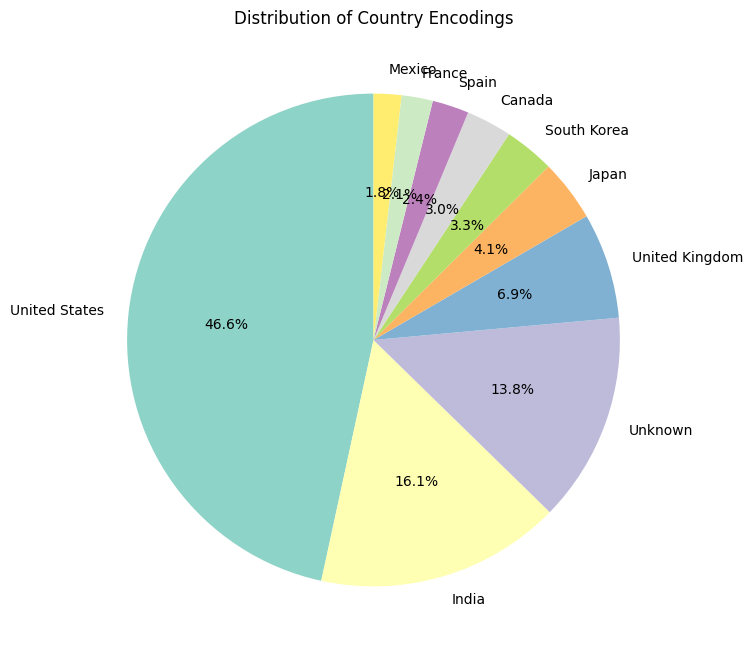

In [52]:
plt.figure(figsize=(8, 8))
df['country'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Country Encodings')
plt.ylabel('')  # Hide y-label for clarity
plt.show()


## Content Type Distribution Across Top 15 Countries

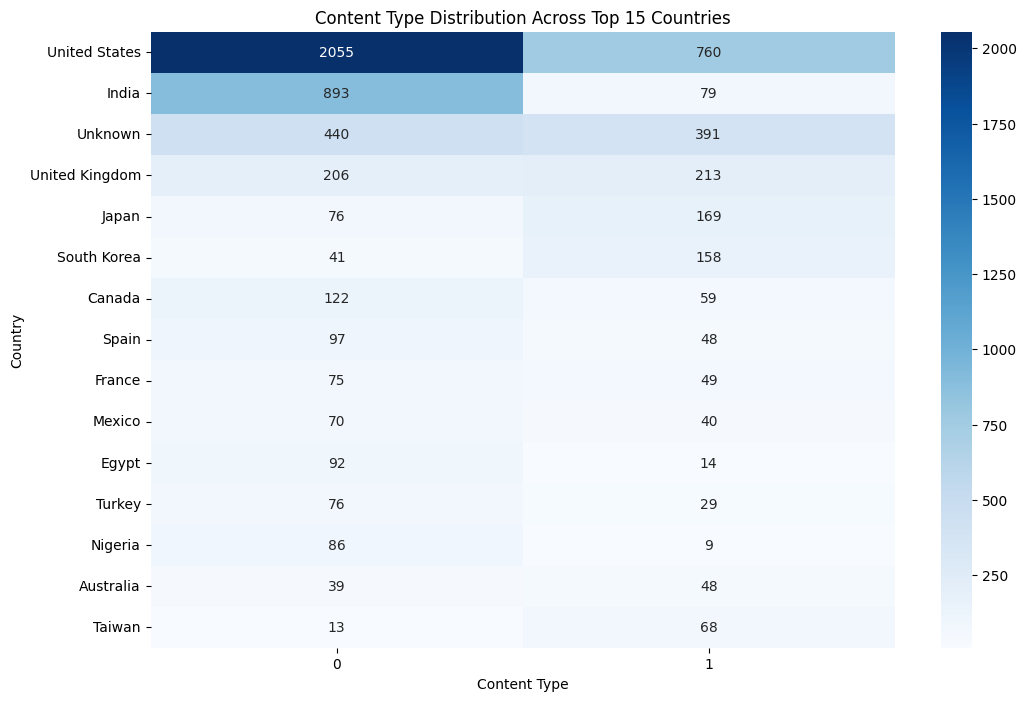

In [53]:
pivot_table = df.pivot_table(index='country', columns='type', aggfunc='size', fill_value=0)
top_countries = pivot_table.sum(axis=1).nlargest(15).index
filtered_pivot = pivot_table.loc[top_countries]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_pivot, cmap='Blues', annot=True, fmt='d')
plt.title('Content Type Distribution Across Top 15 Countries')
plt.xlabel('Content Type')
plt.ylabel('Country')
plt.show()


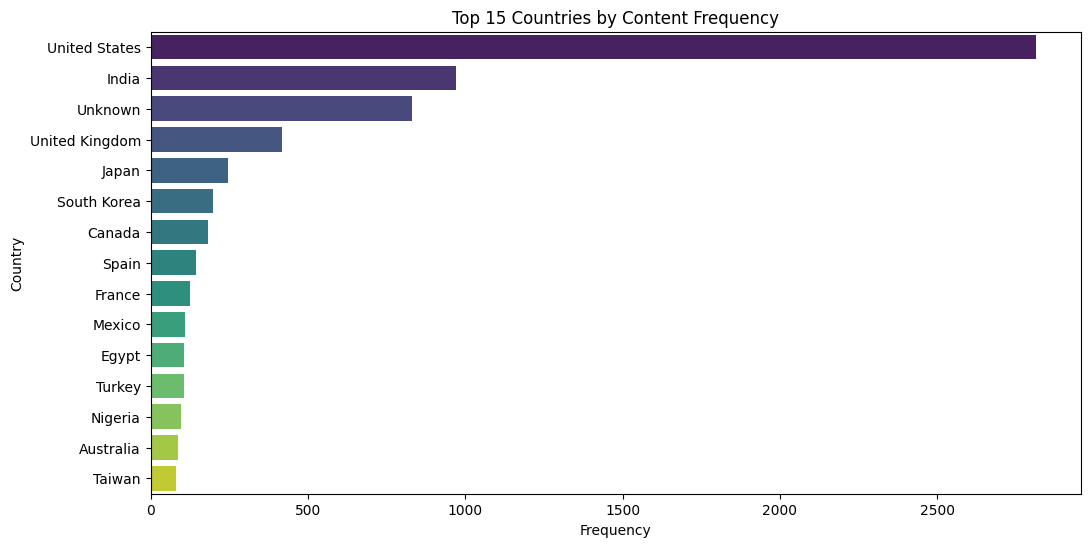

In [54]:
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(15)  # Top 15 countries
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 15 Countries by Content Frequency')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()


In [55]:
df.columns

Index(['type', 'Movie_duration', 'TVShow_Seasons', 'title', 'director', 'cast',
       'country', 'date_added', 'release_year', 'rating', 'listed_in',
       'description', 'age_group', 'age_encoded', 'country_encoded'],
      dtype='object')

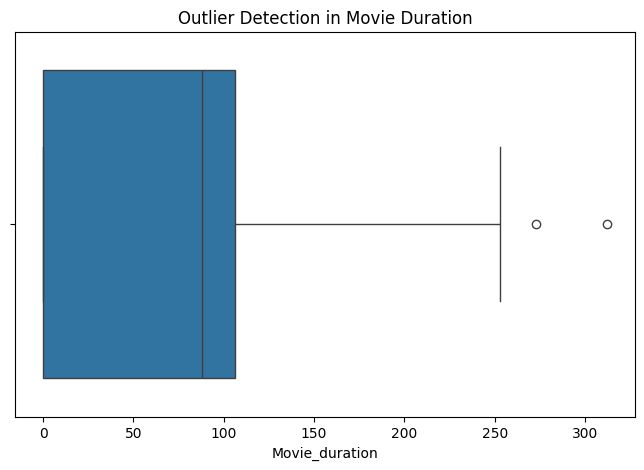

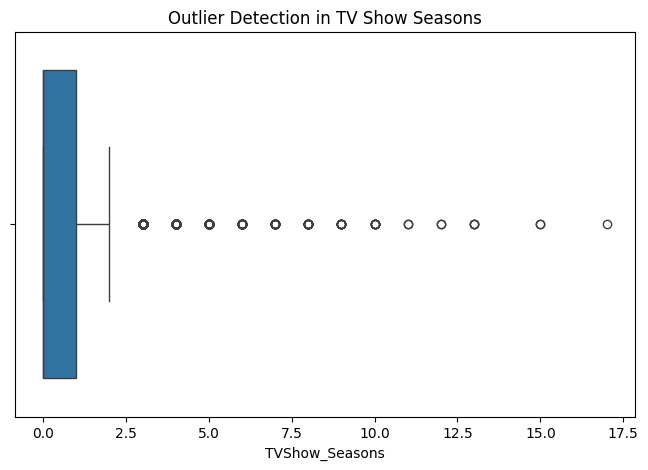

In [56]:
# For Movies
plt.figure(figsize=(8, 5))
sns.boxplot(x='Movie_duration', data=df)
plt.title("Outlier Detection in Movie Duration")
plt.show()

# For TV Shows
plt.figure(figsize=(8, 5))
sns.boxplot(x='TVShow_Seasons', data=df)
plt.title("Outlier Detection in TV Show Seasons")
plt.show()


In [57]:
df.dtypes

type                int64
Movie_duration      int64
TVShow_Seasons      int64
title              object
director           object
cast               object
country            object
date_added         object
release_year        int64
rating             object
listed_in          object
description        object
age_group          object
age_encoded         int64
country_encoded     int64
dtype: object

## Correlation Matrix (Numeric Features

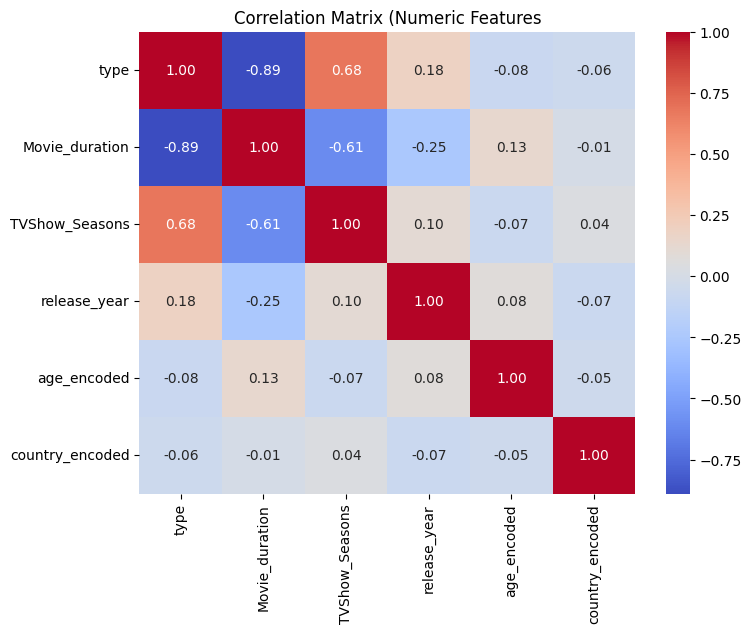

In [58]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features")
plt.show()

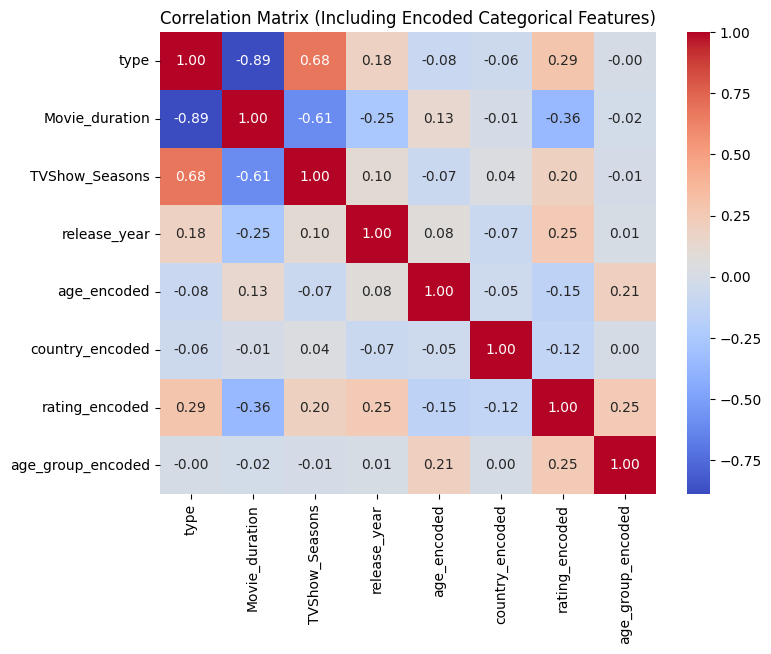

In [59]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoder = LabelEncoder()
df['rating_encoded'] = encoder.fit_transform(df['rating'])
df['age_group_encoded'] = encoder.fit_transform(df['age_group'])

# Updated heatmap with encoded columns
encoded_numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(encoded_numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Including Encoded Categorical Features)")
plt.show()


In [60]:
from collections import Counter

# Set visualization style
sns.set_style("whitegrid")


In [61]:
# Helper function to split and count occurrences (excludes "Unknown", empty values)
def get_top_n(df, column, n=10):
    # Drop missing values and filter out 'Unknown' and empty strings
    valid_items = df[column].dropna()
    valid_items = valid_items[~valid_items.str.contains('Unknown', case=False)]
    valid_items = valid_items[valid_items.str.strip() != '']

    # Flatten the list using list comprehension
    flattened_items = [item for sublist in valid_items.str.split(', ') if sublist for item in sublist]
    if not flattened_items:
        return pd.DataFrame(columns=[column, 'Count'])
    # Count occurrences and return the top n results
    return pd.DataFrame(Counter(flattened_items).most_common(n), columns=[column, 'Count'])


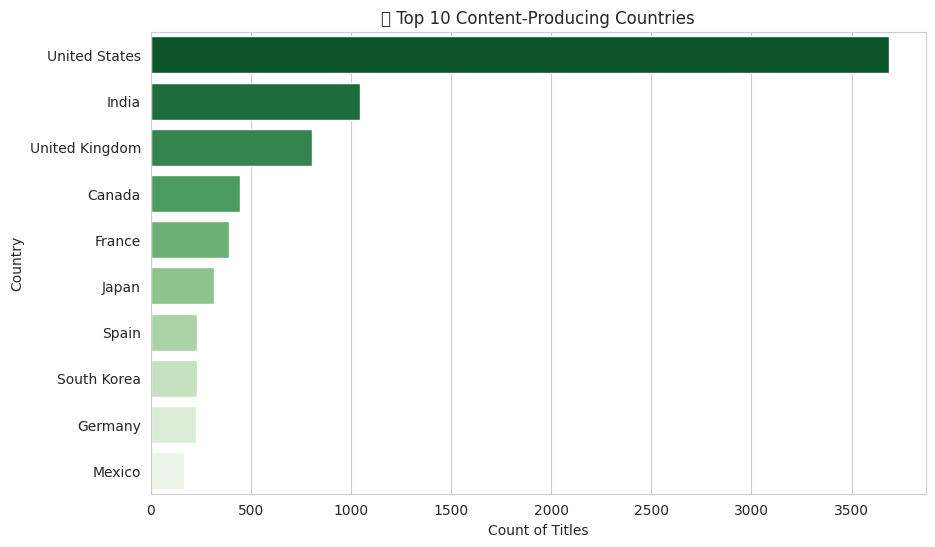

In [62]:

top_countries = get_top_n(df, 'country')
plt.figure(figsize=(10, 6))
sns.barplot(y='country', x='Count', data=top_countries, palette='Greens_r')
plt.title('🌍 Top 10 Content-Producing Countries')
plt.xlabel('Count of Titles')
plt.ylabel('Country')
plt.show()

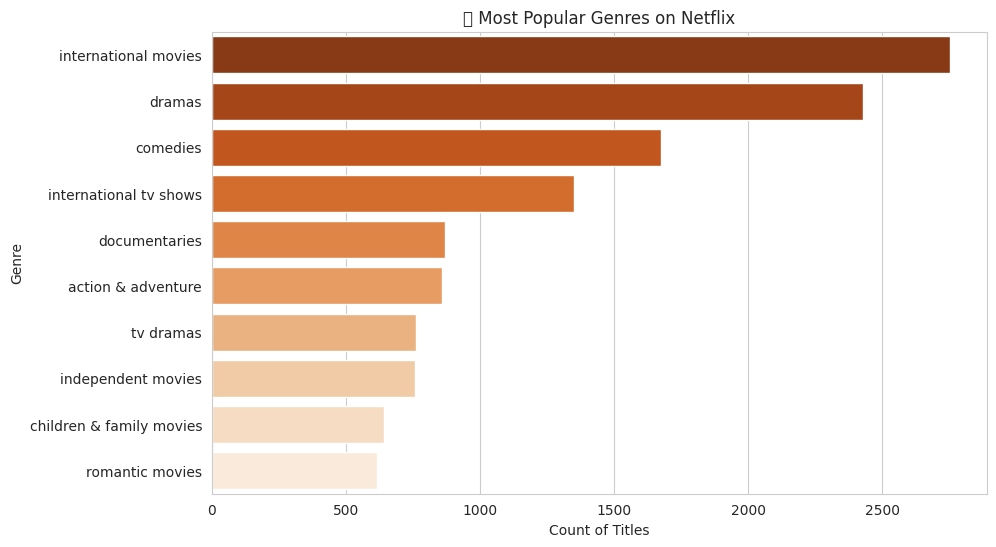

In [63]:

top_genres = get_top_n(df, 'listed_in')
plt.figure(figsize=(10, 6))
sns.barplot(y='listed_in', x='Count', data=top_genres, palette='Oranges_r')
plt.title('📚 Most Popular Genres on Netflix')
plt.xlabel('Count of Titles')
plt.ylabel('Genre')
plt.show()


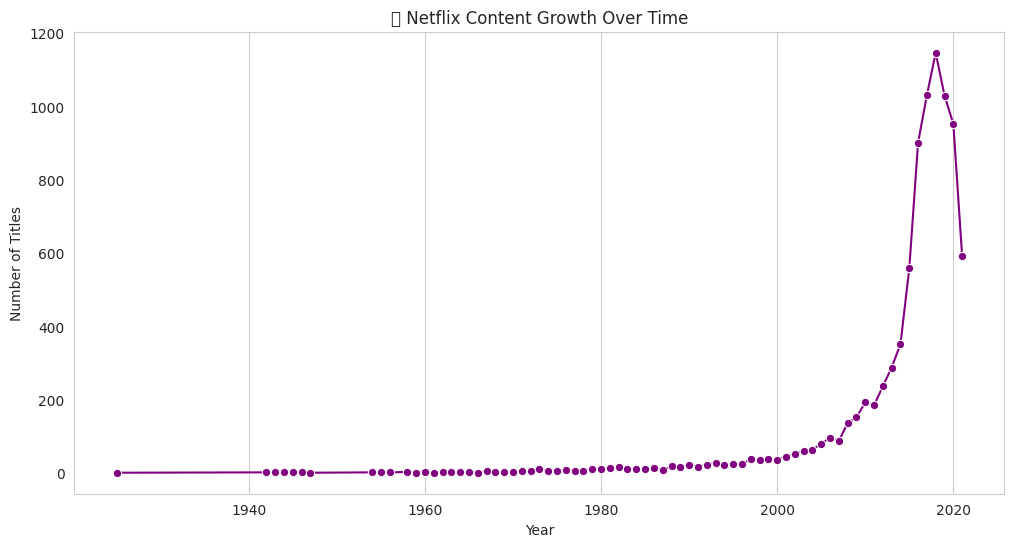

In [64]:
# Ensure 'release_year' is integer type
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Content growth over time
content_by_year = df['release_year'].value_counts().reset_index()
content_by_year.columns = ['Year', 'Count']
content_by_year = content_by_year.sort_values('Year')

# Plotting content growth
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', data=content_by_year, marker='o', color='purple')
plt.title('📊 Netflix Content Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()


In [65]:
content_by_year.head()

,Year,Count
70,1925,1
67,1942,2
58,1943,3
54,1944,3
53,1945,4


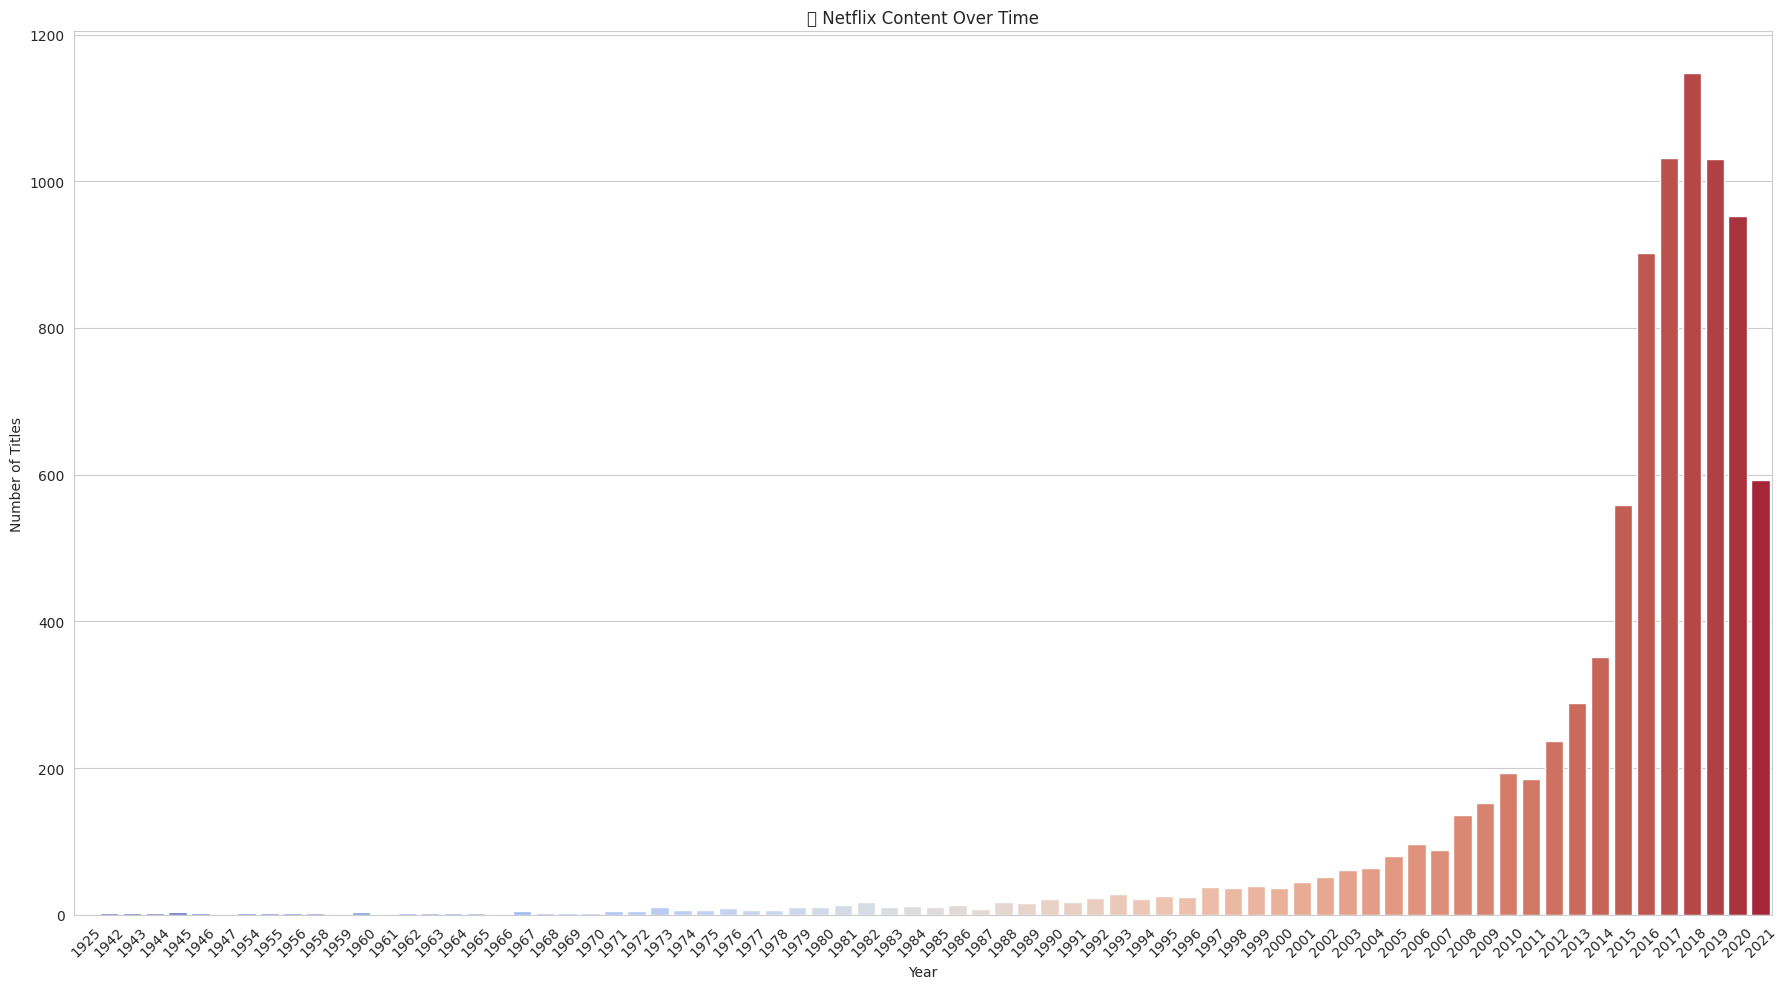

In [66]:
plt.figure(figsize=(18, 10))  # Reduce to a manageable size
sns.barplot(x='Year', y='Count', data=content_by_year, palette='coolwarm')
plt.title('📊 Netflix Content Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Ensure no overlap
plt.show()


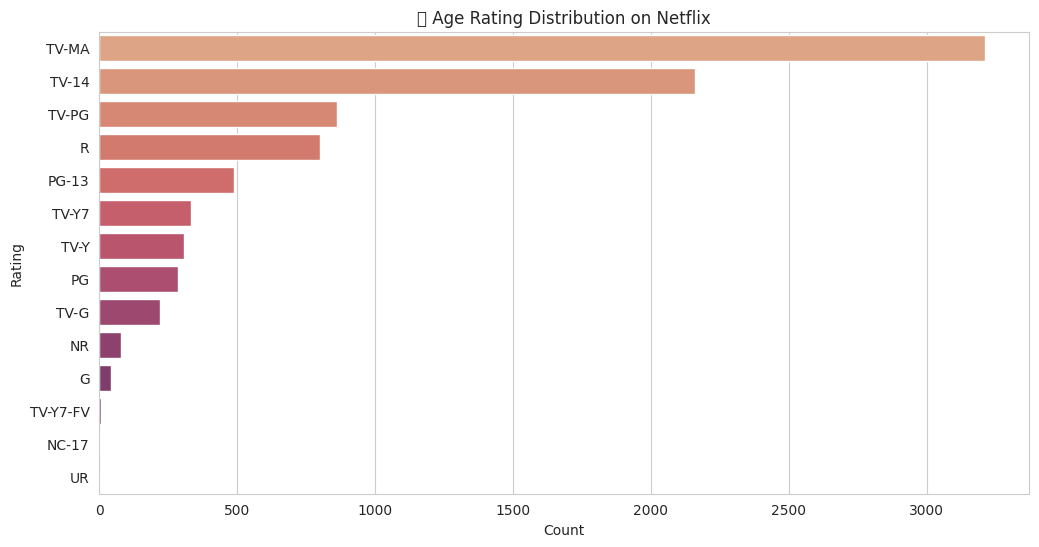

In [67]:
# Content ratings distribution
rating_distribution = df['rating'].value_counts().reset_index()
rating_distribution.columns = ['Rating', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(y='Rating', x='Count', data=rating_distribution, palette='flare')
plt.title('📊 Age Rating Distribution on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


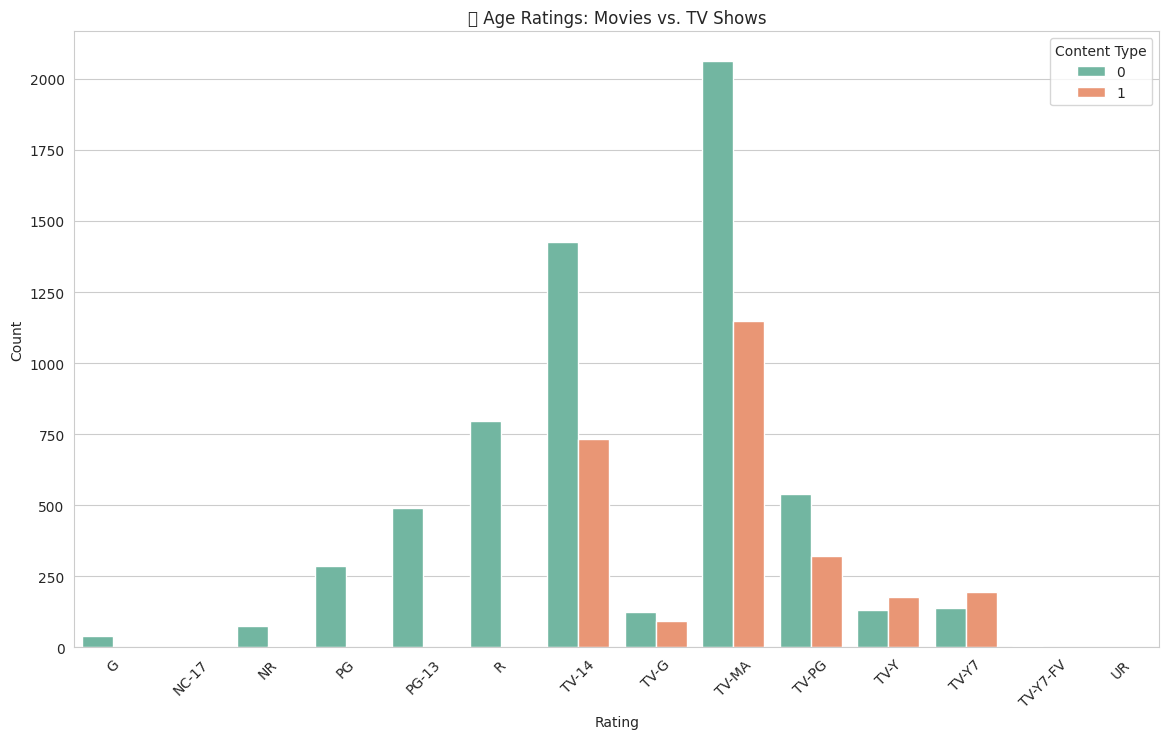

In [68]:
# Rating comparison by content type
rating_by_type = df.groupby(['type', 'rating']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='rating', y='Count', hue='type', data=rating_by_type, palette='Set2')
plt.title('📊 Age Ratings: Movies vs. TV Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.show()


In [69]:
!pip install textblob

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


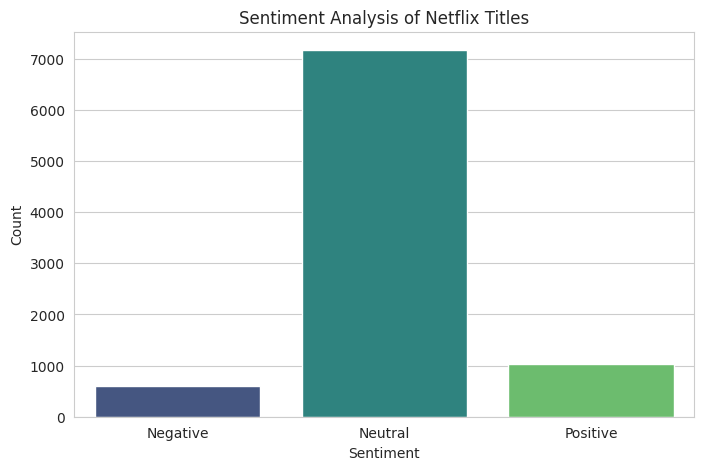

In [70]:
from textblob import TextBlob

# Load the dataset (replace with your dataset path)
df = pd.read_csv('netflix_titles.csv')

# Ensure the title column exists
print(df.columns)

# Sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis on the 'title' column
df['Sentiment'] = df['title'].apply(get_sentiment)

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Analysis of Netflix Titles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


           Word   Frequency
8          life  601.063224
19        young  511.085030
12          new  505.109235
1        family  475.892917
18        world  459.092648
11          man  391.741088
10         love  381.078961
4       friends  349.506775
17        woman  348.698053
15       series  323.363870
0   documentary  310.087718
7          home  246.307672
3         finds  242.382338
14       school  240.750485
2        father  240.281305
5          help  234.813772
13          old  234.752969
9         lives  231.851215
16        takes  226.495290
6          high  211.475534


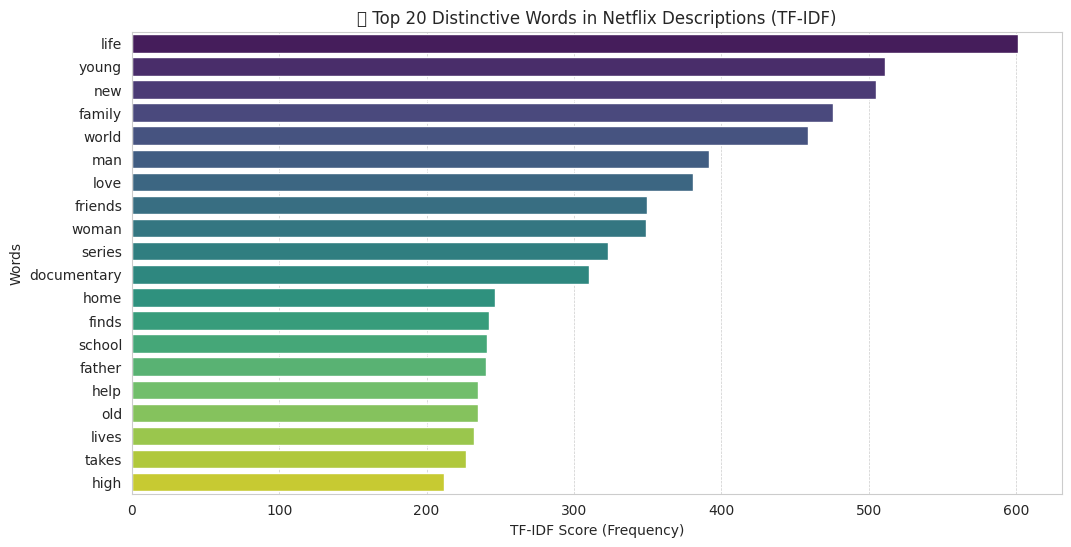

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values
df['description'] = df['description'].fillna('')

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=20)

# Transform descriptions
tfidf_matrix = tfidf.fit_transform(df['description'])

# Get the top words and their corresponding frequencies
feature_names = tfidf.get_feature_names_out()
word_frequencies = tfidf_matrix.toarray().sum(axis=0)

# Create a DataFrame for visualization
tfidf_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort words by frequency in descending order
tfidf_df = tfidf_df.sort_values(by='Frequency', ascending=False)

# Display the top words
print(tfidf_df)

# Plot the TF-IDF Word Frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=tfidf_df, palette='viridis')
plt.title('🔍 Top 20 Distinctive Words in Netflix Descriptions (TF-IDF)')
plt.xlabel('TF-IDF Score (Frequency)')
plt.ylabel('Words')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()

